<a href="https://colab.research.google.com/github/Hani1-2/DeepLearningAssignmnt/blob/master/Cats_all_4_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np

## Data Preparation

In [2]:
data=pd.read_excel("FitBark_structured_clean.xlsx")
data.head()

,DateNumber,Date,Day,Cat.Id,Household.Id,Name,Breed,Age,Gender,Other.Cats,...,Health.Index,Calories,Sleep.score,kms,Activity.Index,Play,Active,Rest,Notes,Activity.Total
0,44468,2021-09-29,Wednesday,1,1,Tia,Burmese,1.0,F,0,...,74.0,305,85,4.39,124.0,43,591,806,NaN,1440
1,44469,2021-09-30,Thursday,1,1,Tia,Burmese,1.0,F,0,...,75.0,282,68,3.80,101.0,40,603,797,NaN,1440
2,44470,2021-10-01,Friday,1,1,Tia,Burmese,1.0,F,0,...,73.0,283,69,3.83,102.0,25,647,768,NaN,1440
3,44471,2021-10-02,Saturday,1,1,Tia,Burmese,1.0,F,0,...,74.0,280,78,3.77,99.0,30,637,773,NaN,1440
4,44473,2021-10-04,Monday,1,1,Tia,Burmese,1.0,F,0,...,74.0,293,65,4.10,108.0,36,606,798,NaN,1440


In [3]:
data.isnull().sum()

DateNumber                0
Date                      0
Day                       0
Cat.Id                    0
Household.Id              0
Name                      0
Breed                     0
Age                     106
Gender                    0
Other.Cats                0
Desexed                   0
Microchipped           2731
Overall.Bark.points       0
Health.Index             42
Calories                  0
Sleep.score               0
kms                       0
Activity.Index           68
Play                      0
Active                    0
Rest                      0
Notes                  2711
Activity.Total            0
dtype: int64

In [4]:
# Checking Categorical Features in dataset and counting it 

cat_features = [columns_name for columns_name in data.columns if data[columns_name].dtype == "O"]
print("Number of Categorical Features we have in data is : {}  ".format(len(cat_features)))
print("Here is Listed features {} ".format(cat_features))
missing_cat = data[cat_features].isnull().sum() # Total missing values 
print(missing_cat)

Number of Categorical Features we have in data is : 5  
Here is Listed features ['Day', 'Name', 'Breed', 'Gender', 'Notes'] 
Day          0
Name         0
Breed        0
Gender       0
Notes     2711
dtype: int64


In [5]:
cat_features_with_null = [features for features in cat_features if data[features].isnull().sum()]  # list will return with categorical features
for each_feature in cat_features_with_null:
  data[each_feature] = data[each_feature].fillna(data[each_feature].mode()[0])

In [6]:
# Checking Numerical Features in dataset and counting it 

num_features = [columns_name for columns_name in data.columns if data[columns_name].dtype != "O"]
print("Number of Numerical Features we have in data is : {}  ".format(len(num_features)))
print("Here is the Listed Numerical features {} ".format(num_features))
missing_num = data[num_features].isnull().sum()    # counting missing values in each  num_feature 
missing_num

Number of Numerical Features we have in data is : 18  
Here is the Listed Numerical features ['DateNumber', 'Date', 'Cat.Id', 'Household.Id', 'Age', 'Other.Cats', 'Desexed', 'Microchipped', 'Overall.Bark.points', 'Health.Index', 'Calories', 'Sleep.score', 'kms', 'Activity.Index', 'Play', 'Active', 'Rest', 'Activity.Total'] 


DateNumber                0
Date                      0
Cat.Id                    0
Household.Id              0
Age                     106
Other.Cats                0
Desexed                   0
Microchipped           2731
Overall.Bark.points       0
Health.Index             42
Calories                  0
Sleep.score               0
kms                       0
Activity.Index           68
Play                      0
Active                    0
Rest                      0
Activity.Total            0
dtype: int64

## Numerical Feature missing values

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

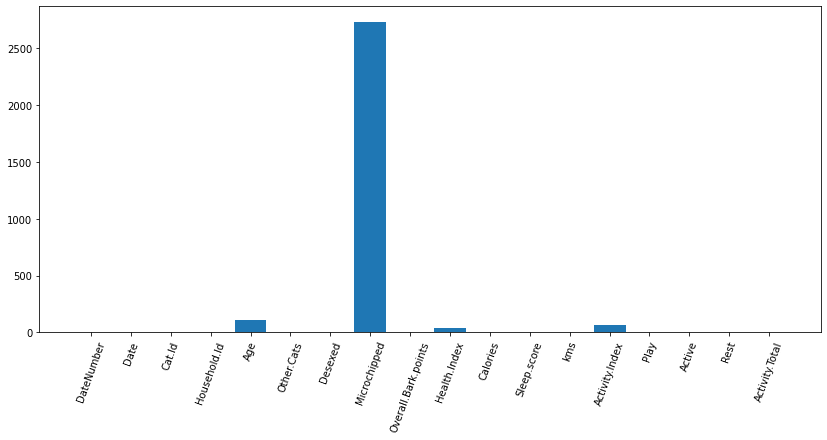

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.bar(missing_num.index,missing_num.values)    # ploting missing values 
plt.xticks(rotation=70)


In [8]:
for features in num_features:
  data[features] = data[features].fillna(data[features].mean())   # all missing values 

In [9]:
data.shape

(2757, 23)

In [10]:
col = data.columns
col  = np.array(col)
print(type(col))

<class 'numpy.ndarray'>


In [11]:
data.isnull().sum() # now no null values

DateNumber             0
Date                   0
Day                    0
Cat.Id                 0
Household.Id           0
Name                   0
Breed                  0
Age                    0
Gender                 0
Other.Cats             0
Desexed                0
Microchipped           0
Overall.Bark.points    0
Health.Index           0
Calories               0
Sleep.score            0
kms                    0
Activity.Index         0
Play                   0
Active                 0
Rest                   0
Notes                  0
Activity.Total         0
dtype: int64

## For Feature Selection

In [25]:
numerical_data = data[['DateNumber', 'Date', 'Cat.Id', 'Household.Id', 'Age', 'Other.Cats', 'Desexed', 'Microchipped', 'Overall.Bark.points', 'Health.Index', 'Calories', 'Sleep.score', 'kms', 'Activity.Index', 'Play', 'Active', 'Rest', 'Activity.Total']]

In [26]:
numerical_data.drop(['DateNumber','Date'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
hi_mean = np.mean(data['Health.Index'])
hi_mean

67.32633517495395

In [28]:
# here we are defining a function 
def encode_cat(feature):   # function will take feature 
  mapping_dic = {}         # empty dic 
  unique_val = list(data[feature].unique())    # extract particular feature from data and convert into list 
  for idx in range(len(unique_val)):      #loop will run till the len of list 
    mapping_dic[unique_val[idx]] = idx    # assign the index to the index of the list 
  return mapping_dic       # return the feature 

In [29]:
for i in cat_features:   # we have the list of categorical features 
  data[i].replace(encode_cat(i), inplace = True)  
  # print(data.head())

In [30]:
# first separate target variable
y = numerical_data[['Health.Index']]
numerical_data.drop(['Health.Index'],axis=1,inplace=True)

## Finding p-values of every feature against our target variable (HI)

In [34]:
import statsmodels.api as sm

In [36]:
col = numerical_data.columns
len(col)

15

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant
y = np.asarray(y)
numerical_data = np.asarray(numerical_data)
X_train,X_test, Y_train, Y_test = train_test_split(numerical_data, y, test_size = .2, random_state = 10)

In [43]:
x_incl_cons = sm.add_constant(X_train)
model = sm.OLS(Y_train, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results
# results.params
# results.pvalues
df = pd.DataFrame({'column': col , 'pvalue': np.round(results.pvalues,3)})
df

,column,pvalue
0,Cat.Id,0.000
1,Household.Id,0.000
2,Age,0.422
3,Other.Cats,0.059
4,Desexed,0.000
5,Microchipped,0.000
6,Overall.Bark.points,0.000
7,Calories,0.834
8,Sleep.score,0.068
9,kms,0.000


In [41]:
new_df = df[df.iloc[:, 1] <=0.05]
sig_col = new_df['column']
list(sig_col)

['Cat.Id',
 'Household.Id',
 'Desexed',
 'Microchipped',
 'Overall.Bark.points',
 'kms',
 'Activity.Index',
 'Play',
 'Active',
 'Rest']

## Now again select only those features whihc pass our hypotheseis p-value test

In [42]:
data.head()

,DateNumber,Date,Day,Cat.Id,Household.Id,Name,Breed,Age,Gender,Other.Cats,...,Health.Index,Calories,Sleep.score,kms,Activity.Index,Play,Active,Rest,Notes,Activity.Total
0,44468,2021-09-29,0,1,1,0,0,1.0,0,0,...,74.0,305,85,4.39,124.0,43,591,806,0,1440
1,44469,2021-09-30,1,1,1,0,0,1.0,0,0,...,75.0,282,68,3.80,101.0,40,603,797,0,1440
2,44470,2021-10-01,2,1,1,0,0,1.0,0,0,...,73.0,283,69,3.83,102.0,25,647,768,0,1440
3,44471,2021-10-02,3,1,1,0,0,1.0,0,0,...,74.0,280,78,3.77,99.0,30,637,773,0,1440
4,44473,2021-10-04,4,1,1,0,0,1.0,0,0,...,74.0,293,65,4.10,108.0,36,606,798,0,1440


In [44]:
final_feature = data[['Cat.Id',
 'Household.Id',
 'Desexed',
 'Microchipped',
 'Overall.Bark.points',
 'kms',
 'Activity.Index',
 'Play',
 'Active',
 'Rest']]

## Now create target column for our Health Index

In [60]:
def cat_health(row):
  if row['Health.Index'] <= hi_mean:
    return "Unhealthy "
  if row['Health.Index'] > hi_mean:
    return "Healthy"

In [61]:
data['Target'] = data.apply(lambda row: cat_health(row), axis=1)
data.head()

,DateNumber,Date,Day,Cat.Id,Household.Id,Name,Breed,Age,Gender,Other.Cats,...,Calories,Sleep.score,kms,Activity.Index,Play,Active,Rest,Notes,Activity.Total,Target
0,44468,2021-09-29,0,1,1,0,0,1.0,0,0,...,305,85,4.39,124.0,43,591,806,0,1440,Healthy
1,44469,2021-09-30,1,1,1,0,0,1.0,0,0,...,282,68,3.80,101.0,40,603,797,0,1440,Healthy
2,44470,2021-10-01,2,1,1,0,0,1.0,0,0,...,283,69,3.83,102.0,25,647,768,0,1440,Healthy
3,44471,2021-10-02,3,1,1,0,0,1.0,0,0,...,280,78,3.77,99.0,30,637,773,0,1440,Healthy
4,44473,2021-10-04,4,1,1,0,0,1.0,0,0,...,293,65,4.10,108.0,36,606,798,0,1440,Healthy


# Encoding and Preparing Dataset for Binary Classification

In [62]:
# Checking Categorical Features in dataset and counting it 

cat_features = [columns_name for columns_name in data.columns if data[columns_name].dtype == "O"]
print("Number of Categorical Features we have in data is : {}  ".format(len(cat_features)))
print("Here is Listed features {} ".format(cat_features))
missing_cat = data[cat_features].isnull().sum() # Total missing values 
print(missing_cat)
for i in cat_features:   # we have the list of categorical features 
  data[i].replace(encode_cat(i), inplace = True)  
  # print(data.head())

Number of Categorical Features we have in data is : 1  
Here is Listed features ['Target'] 
Target    0
dtype: int64


In [63]:
final_data = data[['Cat.Id',
 'Household.Id',
 'Desexed',
 'Microchipped',
 'Overall.Bark.points',
 'kms',
 'Activity.Index',
 'Play',
 'Active',
 'Rest','Target']]
final_data.head()

,Cat.Id,Household.Id,Desexed,Microchipped,Overall.Bark.points,kms,Activity.Index,Play,Active,Rest,Target
0,1,1,1,1.0,6595,4.39,124.0,43,591,806,0
1,1,1,1,1.0,5707,3.80,101.0,40,603,797,0
2,1,1,1,1.0,5761,3.83,102.0,25,647,768,0
3,1,1,1,1.0,5650,3.77,99.0,30,637,773,0
4,1,1,1,1.0,6161,4.10,108.0,36,606,798,0


In [64]:
# first separate target variable
y = final_data[['Target']]
final_data.drop(['Target'],axis=1,inplace=True)
X_train,X_test, Y_train, Y_test = train_test_split(final_data, y, test_size = .2, random_state = 10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2205, 10)
(552, 10)
(2205, 1)
(552, 1)


In [67]:
# Exploring Targeted Variable 
data['Target'].value_counts()

1    1744
0    1013
Name: Target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


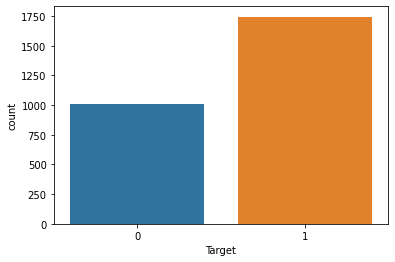

In [68]:
# Exploring Targeted Variable 
import seaborn as sns
sns.countplot(data["Target"])
# 0 -- healthy
# 1 -- unhealthy

# First Try Linear Regression

In [75]:
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve
def evaluate(model):
    model.fit(X_train,Y_train)
    accuracy=model.score(X_test,Y_test)
    # make a prediction
    yhat = model.predict(X_test)
    f1 = f1_score(Y_test,yhat)
    pr = precision_score(Y_test,yhat)
    re = recall_score(Y_test,yhat)

    re_call.append(re)
    precision.append(pr)
    f1_sc.append(f1)
    acc.append(accuracy)
    print('################')
    print('model name ',model)
    print('accuracy ',accuracy)
    print('f1_score',f1)
    print('precision',pr)
    print('recall',re)
    print()

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC #### support vector for classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
dic = {}
re_call = []
precision = []
acc=[]
f1_sc = []
gnb = GaussianNB()
lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier(max_depth=6)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,dt,rf,knn,svm,gnb]

for model in models:
    evaluate(model)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


################
model name  LogisticRegression()
accuracy  0.855072463768116
f1_score 0.8885793871866295
precision 0.8715846994535519
recall 0.90625

################
model name  DecisionTreeClassifier(max_depth=6)
accuracy  0.8586956521739131
f1_score 0.8910614525139665
precision 0.8763736263736264
recall 0.90625

################
model name  RandomForestClassifier(max_samples=0.9)
accuracy  0.8894927536231884
f1_score 0.912981455064194
precision 0.9169054441260746
recall 0.9090909090909091

################
model name  KNeighborsClassifier()
accuracy  0.8170289855072463
f1_score 0.8542568542568543
precision 0.8680351906158358
recall 0.8409090909090909



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


################
model name  SVC()
accuracy  0.8297101449275363
f1_score 0.867231638418079
precision 0.8623595505617978
recall 0.8721590909090909

################
model name  GaussianNB()
accuracy  0.8170289855072463
f1_score 0.8591352859135286
precision 0.8438356164383561
recall 0.875



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
algo = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','SVC','GaussianNB']

In [79]:
dic = {'Algorithm Name':algo,'Accuracy':acc,'F1_Score':f1_sc,'Precision':precision,'Recall':re_call}

In [81]:
new_df  = pd.DataFrame(dic)
new_df

,Algorithm Name,Accuracy,F1_Score,Precision,Recall
0,LogisticRegression,0.855072,0.888579,0.871585,0.906250
1,DecisionTreeClassifier,0.858696,0.891061,0.876374,0.906250
2,RandomForestClassifier,0.889493,0.912981,0.916905,0.909091
3,KNeighborsClassifier,0.817029,0.854257,0.868035,0.840909
4,SVC,0.829710,0.867232,0.862360,0.872159
5,GaussianNB,0.817029,0.859135,0.843836,0.875000
